In [1]:
import pandas as pd

# Using a raw string for the file path:
df = pd.read_csv(r'C:\Users\andrew.dilley\development\URGS\URGS.csv')

# Alternatively, using double backslashes:
# df = pd.read_csv('C:\\Users\\andrew.dilley\\development\\URGS\\URGS.csv')

print(df.head())


   property_no description  debt_amount  \
0    740700850    Hamilton        97.32   
1   1543450600   Casterton       500.00   
2   5211730400  Dennington       500.00   
3   5211730400  Dennington          NaN   
4    444735200   Coleraine          NaN   

                              event_description event_datetime  
0  URGs Application - Successful - FC2017/07266     27/07/2017  
1  URGs Application - Successful - FC2017/07269     27/07/2017  
2  URGs Application - Successful - FC2017/07271     27/07/2017  
3                                           NaN      8/08/2017  
4  URGs Application - Successful - FC2017/07959     16/08/2017  


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   property_no        1565 non-null   int64  
 1   description        1565 non-null   object 
 2   debt_amount        1284 non-null   float64
 3   event_description  1563 non-null   object 
 4   event_datetime     1565 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 61.3+ KB


In [3]:
# For numerical data only (default)
print(df.describe())

# For all columns, including categorical data
print(df.describe(include='all'))


        property_no  debt_amount
count  1.565000e+03  1284.000000
mean   4.868943e+09   429.288917
std    3.071953e+09   202.774224
min    1.402202e+08    17.570000
25%    2.205121e+09   221.765000
50%    5.204311e+09   459.765000
75%    8.107670e+09   650.000000
max    9.333852e+09   854.510000
         property_no  description  debt_amount              event_description  \
count   1.565000e+03         1565  1284.000000                           1563   
unique           NaN           39          NaN                           1212   
top              NaN  Warrnambool          NaN  URGs Application - Successful   
freq             NaN          504          NaN                            183   
mean    4.868943e+09          NaN   429.288917                            NaN   
std     3.071953e+09          NaN   202.774224                            NaN   
min     1.402202e+08          NaN    17.570000                            NaN   
25%     2.205121e+09          NaN   221.765000         

In [4]:
import pandas as pd

# Convert the 'event_datetime' column to datetime, handling errors by setting invalid parsing as NaT.
df['event_datetime'] = pd.to_datetime(df['event_datetime'], errors='coerce')

# Verify the change
print(df['event_datetime'].dtypes)
print(df.head())


datetime64[ns]
   property_no description  debt_amount  \
0    740700850    Hamilton        97.32   
1   1543450600   Casterton       500.00   
2   5211730400  Dennington       500.00   
3   5211730400  Dennington          NaN   
4    444735200   Coleraine          NaN   

                              event_description event_datetime  
0  URGs Application - Successful - FC2017/07266     2017-07-27  
1  URGs Application - Successful - FC2017/07269     2017-07-27  
2  URGs Application - Successful - FC2017/07271     2017-07-27  
3                                           NaN     2017-08-08  
4  URGs Application - Successful - FC2017/07959     2017-08-16  


C:\Users\andrew.dilley\AppData\Local\Temp\ipykernel_45884\2930286551.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['event_datetime'] = pd.to_datetime(df['event_datetime'], errors='coerce')


In [5]:
# For numerical data only (default)
print(df.describe())

# For all columns, including categorical data
print(df.describe(include='all'))


        property_no  debt_amount                 event_datetime
count  1.565000e+03  1284.000000                           1565
mean   4.868943e+09   429.288917  2022-01-30 00:48:46.006390016
min    1.402202e+08    17.570000            2017-07-27 00:00:00
25%    2.205121e+09   221.765000            2019-11-27 00:00:00
50%    5.204311e+09   459.765000            2022-07-06 00:00:00
75%    8.107670e+09   650.000000            2024-02-26 00:00:00
max    9.333852e+09   854.510000            2025-03-03 00:00:00
std    3.071953e+09   202.774224                            NaN
         property_no  description  debt_amount              event_description  \
count   1.565000e+03         1565  1284.000000                           1563   
unique           NaN           39          NaN                           1212   
top              NaN  Warrnambool          NaN  URGs Application - Successful   
freq             NaN          504          NaN                            183   
mean    4.868943e+0

In [6]:
# Extract the year from 'event_datetime'
df['year'] = df['event_datetime'].dt.year

# Group by the year and count the records
yearly_counts = df.groupby('year').size().reset_index(name='Successful URGS applications')

# Sort the data by year (optional but ensures proper order on the x-axis)
yearly_counts = yearly_counts.sort_values(by='year')


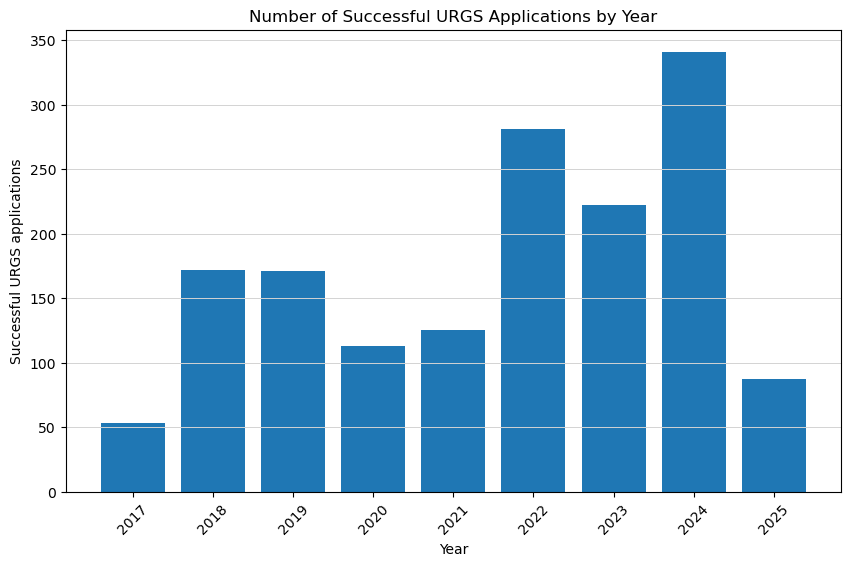

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(yearly_counts['year'].astype(str), yearly_counts['Successful URGS applications'])
plt.xlabel("Year")
plt.ylabel("Successful URGS applications")
plt.title("Number of Successful URGS Applications by Year")
plt.xticks(rotation=45)
# Add horizontal grid lines with light grey color
plt.grid(axis='y', color='lightgrey', linestyle='-', linewidth=0.7)
plt.show()


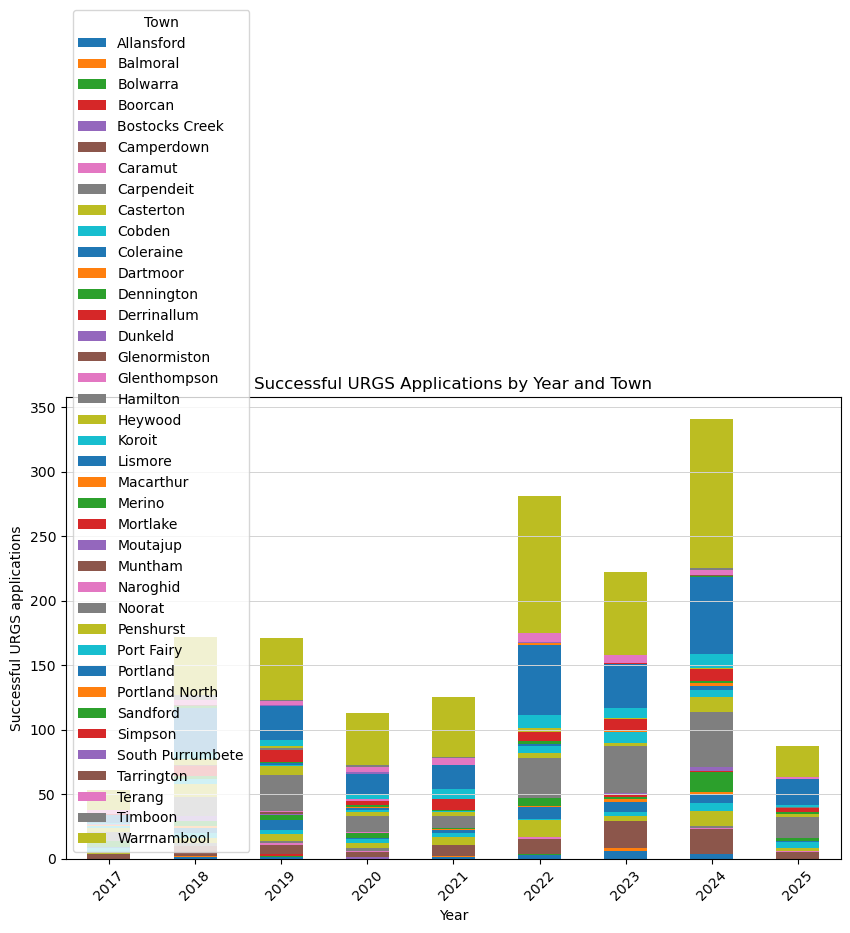

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'event_datetime' column to datetime format (if not already converted)
df['event_datetime'] = pd.to_datetime(df['event_datetime'], errors='coerce')

# Rename 'description' to 'town'
df.rename(columns={'description': 'town'}, inplace=True)

# Extract the year from 'event_datetime'
df['year'] = df['event_datetime'].dt.year

# Group the data by year and town, count the records, and unstack for a stacked bar chart
agg_data = df.groupby(['year', 'town']).size().unstack(fill_value=0).sort_index()

# Plot the stacked bar chart with light grey horizontal grid lines
plt.figure(figsize=(10, 6))
agg_data.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('Year')
plt.ylabel('Successful URGS applications')
plt.title('Successful URGS Applications by Year and Town')
plt.xticks(rotation=45)
plt.grid(axis='y', color='lightgrey', linestyle='-', linewidth=0.7)
plt.legend(title='Town')
plt.show()


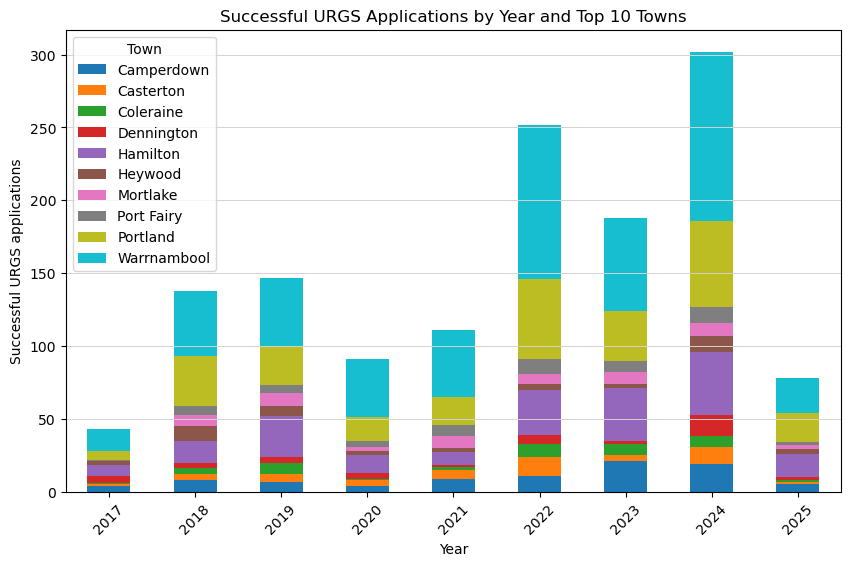

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'event_datetime' to datetime format
df['event_datetime'] = pd.to_datetime(df['event_datetime'], errors='coerce')

# Rename 'description' to 'town'
df.rename(columns={'description': 'town'}, inplace=True)

# Extract the year from 'event_datetime'
df['year'] = df['event_datetime'].dt.year

# Compute the top 10 towns based on the overall count of records
top_towns = df.groupby('town').size().sort_values(ascending=False).head(10).index.tolist()

# Filter the data to only include rows with a town in the top 10
filtered_df = df[df['town'].isin(top_towns)]

# Aggregate the data by year and town, count the records, and unstack for the stacked bar chart
agg_data = filtered_df.groupby(['year', 'town']).size().unstack(fill_value=0).sort_index()

# Plot the stacked bar chart with light grey horizontal grid lines
plt.figure(figsize=(10, 6))
agg_data.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('Year')
plt.ylabel('Successful URGS applications')
plt.title('Successful URGS Applications by Year and Top 10 Towns')
plt.xticks(rotation=45)
plt.grid(axis='y', color='lightgrey', linestyle='-', linewidth=0.7)
plt.legend(title='Town')
plt.show()


In [11]:
# Exclude records with a null debt_amount and create a copy
filtered_df = df[df['debt_amount'].notnull()].copy()


In [12]:
import numpy as np

# Define bins: note np.inf will capture anything above 800
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, np.inf]

# Create corresponding labels for each range
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', 
          '301-350', '351-400', '401-450', '451-500', '501-550', '551-600', 
          '601-650', '651-700', '701-750', '751-800', '>800']


In [13]:
# Categorize the debt_amount values into the defined bins
filtered_df['debt_range'] = pd.cut(
    filtered_df['debt_amount'], 
    bins=bins, 
    labels=labels, 
    right=True,         # Include the right edge in each interval (default behavior)
    include_lowest=True  # Ensure the lowest value (0) is included in the first bin
)


In [14]:
# Count the number of records per debt_range and sort by the order of the bins
range_counts = filtered_df['debt_range'].value_counts().sort_index()


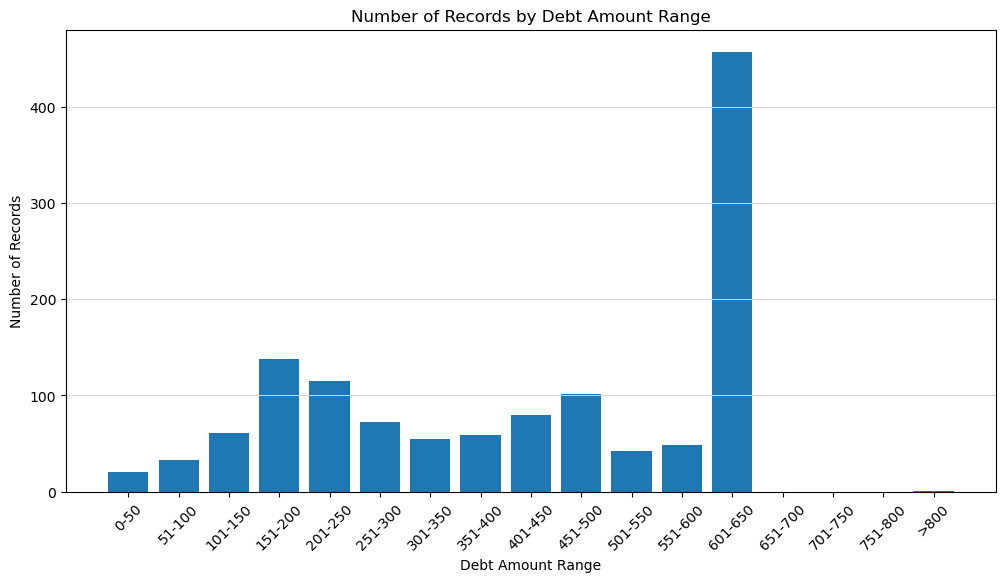

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(range_counts.index.astype(str), range_counts.values)
plt.xlabel('Debt Amount Range')
plt.ylabel('Number of Records')
plt.title('Number of Records by Debt Amount Range')
plt.xticks(rotation=45)  # Rotate labels for better readability
# Add light grey horizontal grid lines
plt.grid(axis='y', color='lightgrey', linestyle='-', linewidth=0.7)
plt.show()


C:\Users\andrew.dilley\AppData\Local\Temp\ipykernel_45884\2711142595.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  warrnambool_df['debt_range'] = pd.cut(


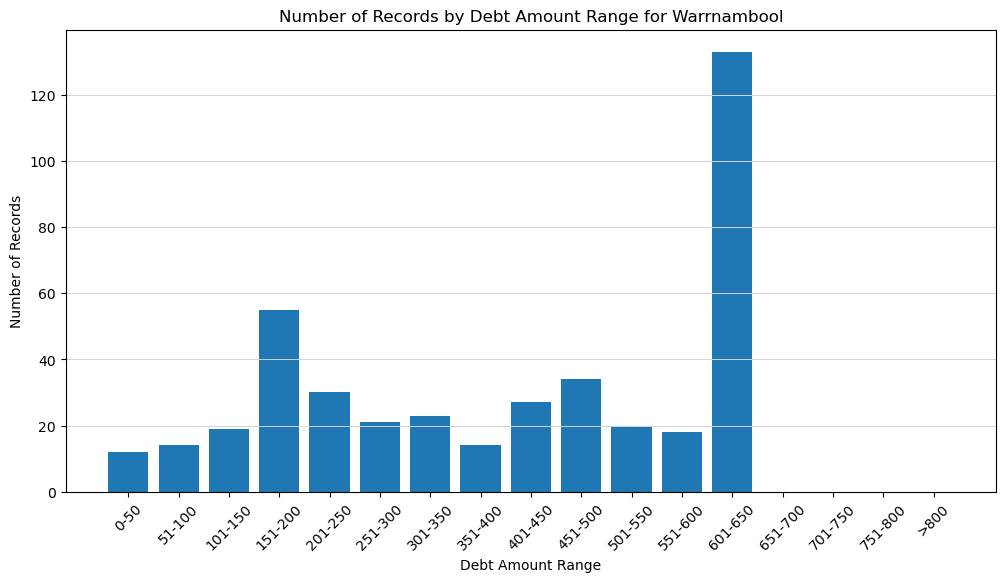

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure your DataFrame (df) has a column 'town' and 'debt_amount'
# Exclude records with a null debt_amount and create a copy
filtered_df = df[df['debt_amount'].notnull()].copy()

# Filter the data to only include records for Warrnambool (ignoring case)
warrnambool_df = filtered_df[filtered_df['town'].str.lower() == 'warrnambool']

# Define the bins for debt_amount ranges (0-50, 51-100, ..., >800)
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, np.inf]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300',
          '301-350', '351-400', '401-450', '451-500', '501-550', '551-600',
          '601-650', '651-700', '701-750', '751-800', '>800']

# Categorize the debt_amount values into the defined bins
warrnambool_df['debt_range'] = pd.cut(
    warrnambool_df['debt_amount'], 
    bins=bins, 
    labels=labels, 
    right=True, 
    include_lowest=True
)

# Count the number of records per debt_range and sort by bin order
range_counts = warrnambool_df['debt_range'].value_counts().sort_index()

# Plot the bar chart with light grey horizontal grid lines
plt.figure(figsize=(12, 6))
plt.bar(range_counts.index.astype(str), range_counts.values)
plt.xlabel('Debt Amount Range')
plt.ylabel('Number of Records')
plt.title('Number of Records by Debt Amount Range for Warrnambool')
plt.xticks(rotation=45)
plt.grid(axis='y', color='lightgrey', linestyle='-', linewidth=0.7)
plt.show()


C:\Users\andrew.dilley\AppData\Local\Temp\ipykernel_45884\2846758580.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  warrnambool_df['debt_range'] = pd.cut(


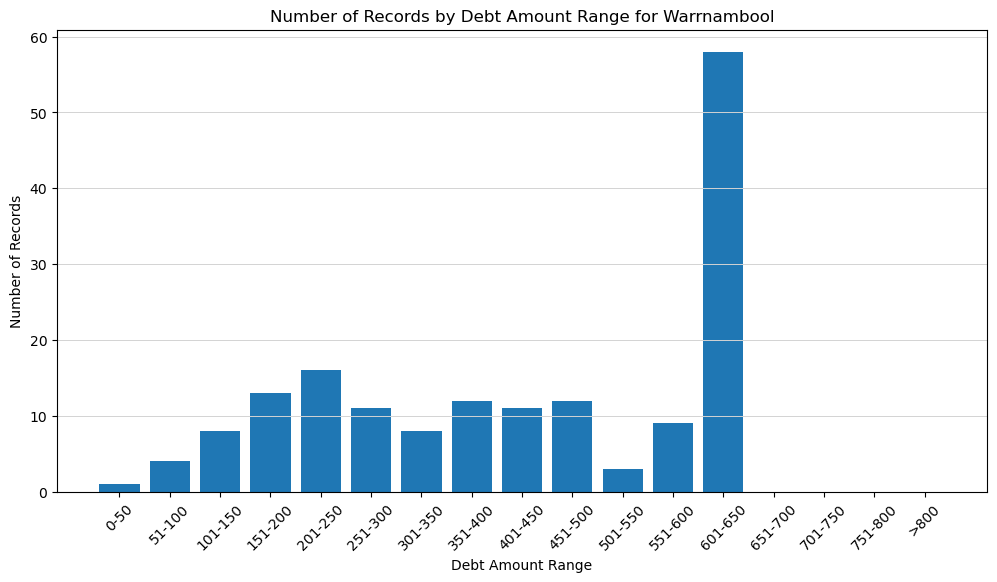

In [17]:

# Ensure your DataFrame (df) has a column 'town' and 'debt_amount'
# Exclude records with a null debt_amount and create a copy
filtered_df = df[df['debt_amount'].notnull()].copy()

# Filter the data to only include records for Warrnambool (ignoring case)
warrnambool_df = filtered_df[filtered_df['town'].str.lower() == 'hamilton']

# Define the bins for debt_amount ranges (0-50, 51-100, ..., >800)
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, np.inf]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300',
          '301-350', '351-400', '401-450', '451-500', '501-550', '551-600',
          '601-650', '651-700', '701-750', '751-800', '>800']

# Categorize the debt_amount values into the defined bins
warrnambool_df['debt_range'] = pd.cut(
    warrnambool_df['debt_amount'], 
    bins=bins, 
    labels=labels, 
    right=True, 
    include_lowest=True
)

# Count the number of records per debt_range and sort by bin order
range_counts = warrnambool_df['debt_range'].value_counts().sort_index()

# Plot the bar chart with light grey horizontal grid lines
plt.figure(figsize=(12, 6))
plt.bar(range_counts.index.astype(str), range_counts.values)
plt.xlabel('Debt Amount Range')
plt.ylabel('Number of Records')
plt.title('Number of Records by Debt Amount Range for Hamilton')
plt.xticks(rotation=45)
plt.grid(axis='y', color='lightgrey', linestyle='-', linewidth=0.7)
plt.show()


C:\Users\andrew.dilley\AppData\Local\Temp\ipykernel_45884\2296958470.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  warrnambool_df['debt_range'] = pd.cut(


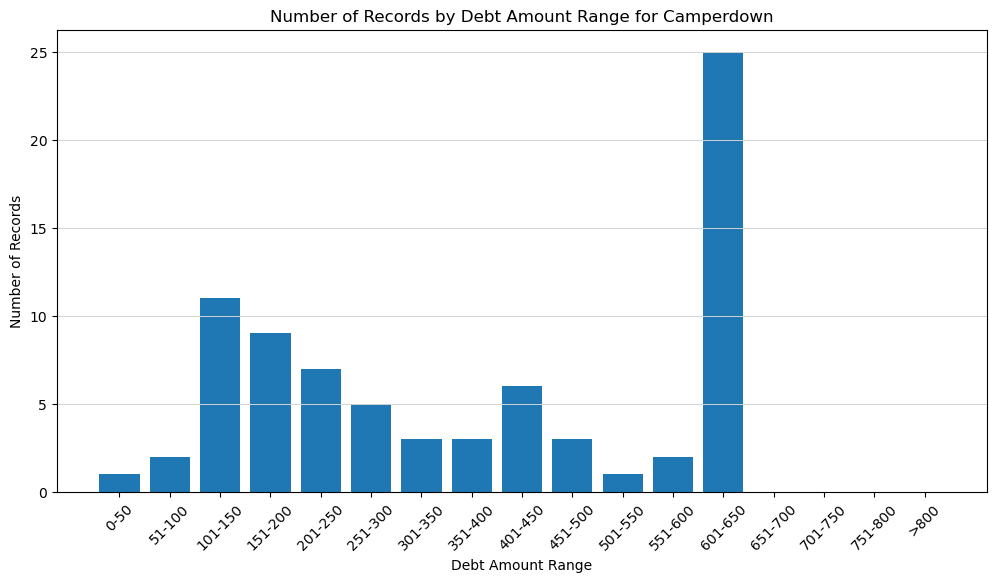

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure your DataFrame (df) has a column 'town' and 'debt_amount'
# Exclude records with a null debt_amount and create a copy
filtered_df = df[df['debt_amount'].notnull()].copy()

# Filter the data to only include records for Warrnambool (ignoring case)
warrnambool_df = filtered_df[filtered_df['town'].str.lower() == 'camperdown']

# Define the bins for debt_amount ranges (0-50, 51-100, ..., >800)
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, np.inf]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300',
          '301-350', '351-400', '401-450', '451-500', '501-550', '551-600',
          '601-650', '651-700', '701-750', '751-800', '>800']

# Categorize the debt_amount values into the defined bins
warrnambool_df['debt_range'] = pd.cut(
    warrnambool_df['debt_amount'], 
    bins=bins, 
    labels=labels, 
    right=True, 
    include_lowest=True
)

# Count the number of records per debt_range and sort by bin order
range_counts = warrnambool_df['debt_range'].value_counts().sort_index()

# Plot the bar chart with light grey horizontal grid lines
plt.figure(figsize=(12, 6))
plt.bar(range_counts.index.astype(str), range_counts.values)
plt.xlabel('Debt Amount Range')
plt.ylabel('Number of Records')
plt.title('Number of Records by Debt Amount Range for Camperdown')
plt.xticks(rotation=45)
plt.grid(axis='y', color='lightgrey', linestyle='-', linewidth=0.7)
plt.show()


C:\Users\andrew.dilley\AppData\Local\Temp\ipykernel_45884\79865991.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  warrnambool_df['debt_range'] = pd.cut(


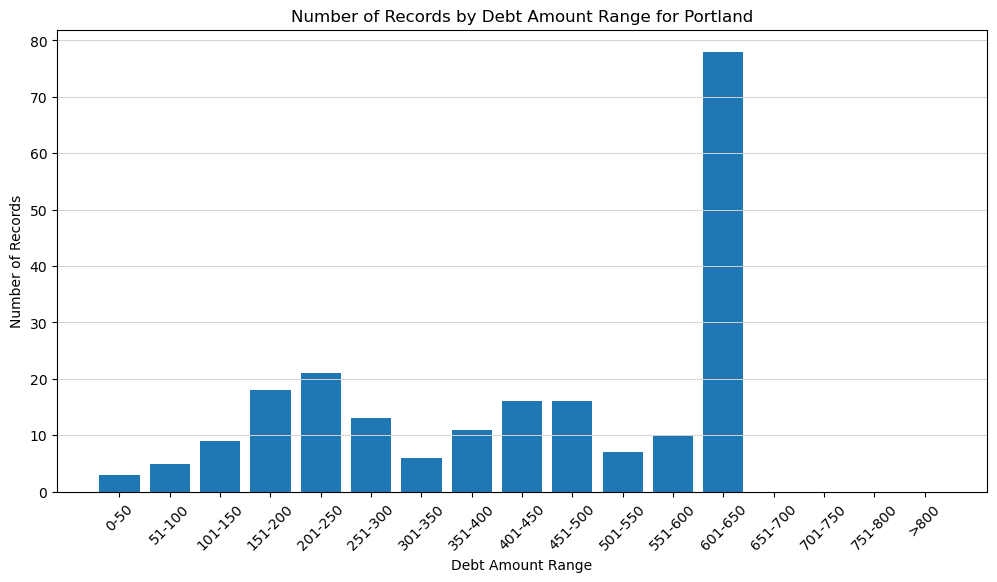

In [19]:

# Ensure your DataFrame (df) has a column 'town' and 'debt_amount'
# Exclude records with a null debt_amount and create a copy
filtered_df = df[df['debt_amount'].notnull()].copy()

# Filter the data to only include records for Warrnambool (ignoring case)
warrnambool_df = filtered_df[filtered_df['town'].str.lower() == 'portland']

# Define the bins for debt_amount ranges (0-50, 51-100, ..., >800)
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, np.inf]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300',
          '301-350', '351-400', '401-450', '451-500', '501-550', '551-600',
          '601-650', '651-700', '701-750', '751-800', '>800']

# Categorize the debt_amount values into the defined bins
warrnambool_df['debt_range'] = pd.cut(
    warrnambool_df['debt_amount'], 
    bins=bins, 
    labels=labels, 
    right=True, 
    include_lowest=True
)

# Count the number of records per debt_range and sort by bin order
range_counts = warrnambool_df['debt_range'].value_counts().sort_index()

# Plot the bar chart with light grey horizontal grid lines
plt.figure(figsize=(12, 6))
plt.bar(range_counts.index.astype(str), range_counts.values)
plt.xlabel('Debt Amount Range')
plt.ylabel('Number of Records')
plt.title('Number of Records by Debt Amount Range for Portland')
plt.xticks(rotation=45)
plt.grid(axis='y', color='lightgrey', linestyle='-', linewidth=0.7)
plt.show()


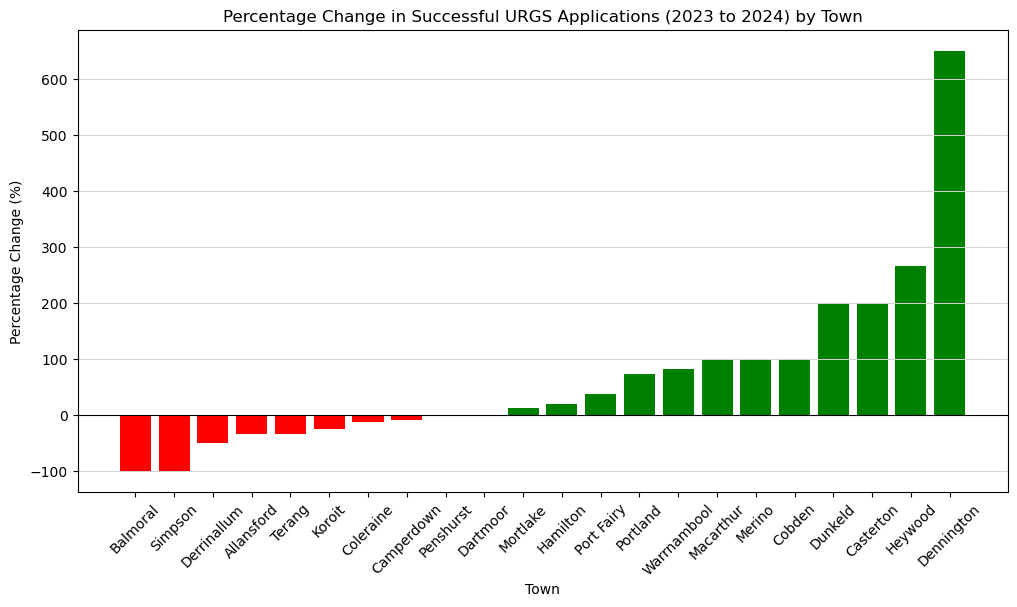

In [20]:

# Ensure 'event_datetime' is in datetime format and extract 'year'
df['event_datetime'] = pd.to_datetime(df['event_datetime'], errors='coerce')
df['year'] = df['event_datetime'].dt.year

# Filter the DataFrame to include only records for 2023 and 2024
df_filtered = df[df['year'].isin([2023, 2024])]

# Group by 'town' and 'year' and count the records
town_year_counts = df_filtered.groupby(['town', 'year']).size().unstack(fill_value=0)

# Define a function to compute percentage change from 2023 to 2024
def compute_pct_change(row):
    count_2023 = row.get(2023, 0)
    count_2024 = row.get(2024, 0)
    # Avoid division by zero: if there are no records in 2023, return NaN
    if count_2023 == 0:
        return np.nan
    else:
        return ((count_2024 - count_2023) / count_2023) * 100

# Apply the function to compute percentage change for each town
town_year_counts['pct_change'] = town_year_counts.apply(compute_pct_change, axis=1)

# Optionally, drop towns where the percentage change could not be computed
town_changes = town_year_counts.dropna(subset=['pct_change'])

# Sort the DataFrame by percentage change to facilitate visualization
town_changes = town_changes.sort_values('pct_change')

# Create a bar chart with distinct colors for positive and negative changes
plt.figure(figsize=(12, 6))
colors = ['green' if x >= 0 else 'red' for x in town_changes['pct_change']]
plt.bar(town_changes.index, town_changes['pct_change'], color=colors)
plt.axhline(0, color='black', linewidth=0.8)  # Add a horizontal line at 0%
plt.xlabel('Town')
plt.ylabel('Percentage Change (%)')
plt.title('Percentage Change in Successful URGS Applications (2023 to 2024) by Town')
plt.xticks(rotation=45)
plt.grid(axis='y', color='lightgrey', linestyle='-', linewidth=0.7)
plt.show()


In [21]:
import os
print("Current working directory:", os.getcwd())


Current working directory: C:\Users\andrew.dilley
